In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

In [3]:
data = pd.read_csv("/content/dataset_heart.csv",index_col=0)

In [4]:
if "age" not in data.columns:
  data.reset_index(inplace=True)
  data

In [5]:
data.columns = [column.strip().replace(' ', '_').lower() for column in data.columns]


In [ ]:
data

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [ ]:
data.shape

(270, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [ ]:
data.dtypes

age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
heart disease                             int64
dtype: object

In [ ]:
data[data.duplicated()].shape

(0, 14)

In [ ]:
data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [ ]:
data.tail(10)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
260,58,0,3,120,340,0,0,172,0,0.0,1,0,3,1
261,60,1,4,130,206,0,2,132,1,2.4,2,2,7,2
262,58,1,2,120,284,0,2,160,0,1.8,2,0,3,2
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
264,48,1,2,110,229,0,0,168,0,1.0,3,0,7,2
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2


Text(0, 0.5, 'Frequency')

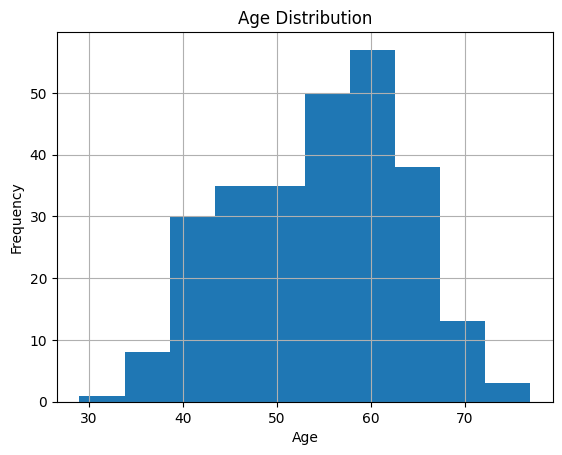

In [ ]:
data ['age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')


Text(0, 0.5, 'Age')

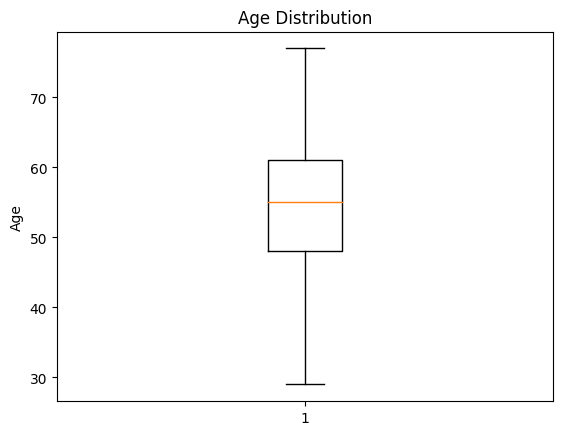

In [ ]:
data1_box=data_box.age
plt.boxplot(data1_box)
plt.title('Age Distribution')
plt.ylabel('Age')



In [ ]:
age_distribution= data["age"].describe()
age_distribution

count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [ ]:
total_patients = data.shape[0]

In [ ]:
total_patients

270

In [ ]:
heart_disease_counts = data["heart disease"].value_counts()
heart_disease_counts

heart disease
1    150
2    120
Name: count, dtype: int64

<Axes: xlabel='heart disease'>

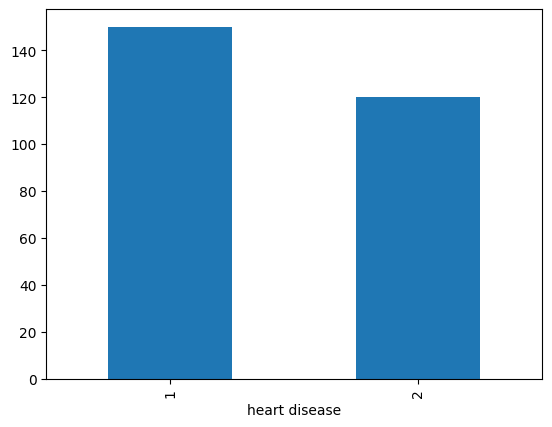

In [ ]:
data['heart disease'].value_counts().plot.bar()

In [ ]:
data.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


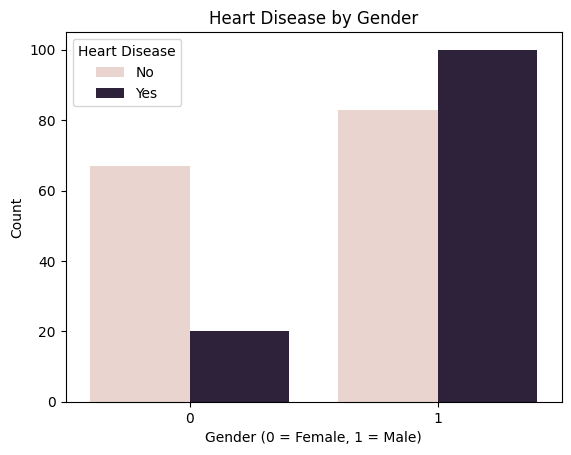

In [ ]:
sns.countplot(x='sex', hue='heart_disease', data=data)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()




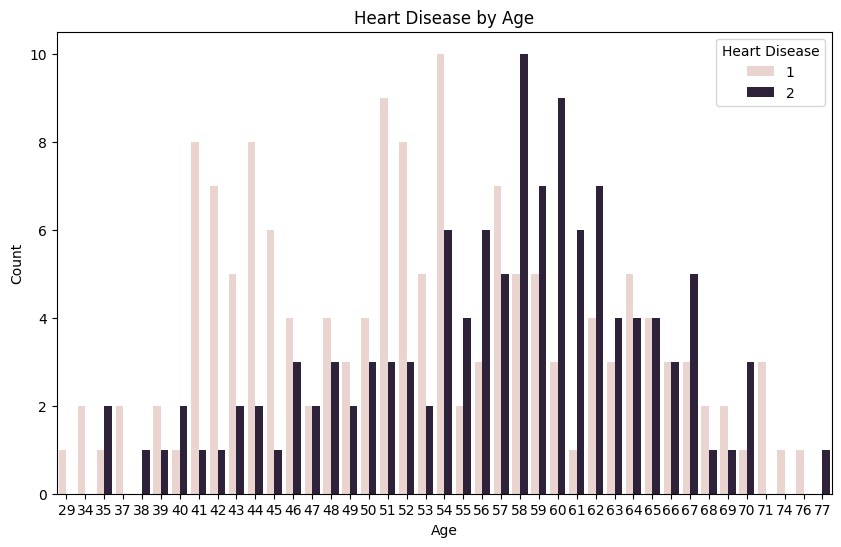

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='heart_disease', data=data)
plt.title('Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

Age is related o heart disease presence.

In [ ]:
data.corr()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
resting blood pressure,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
serum cholestoral,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
fasting blood sugar,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
resting electrocardiographic results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
max heart rate,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
exercise induced angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


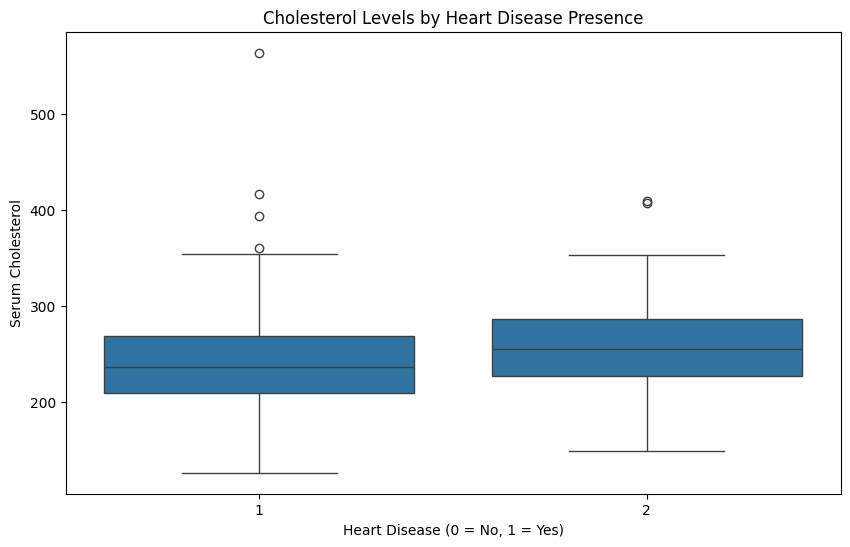

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='heart_disease', y='serum_cholestoral', data=data)
plt.title('Cholesterol Levels by Heart Disease Presence')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Serum Cholesterol')
plt.show()

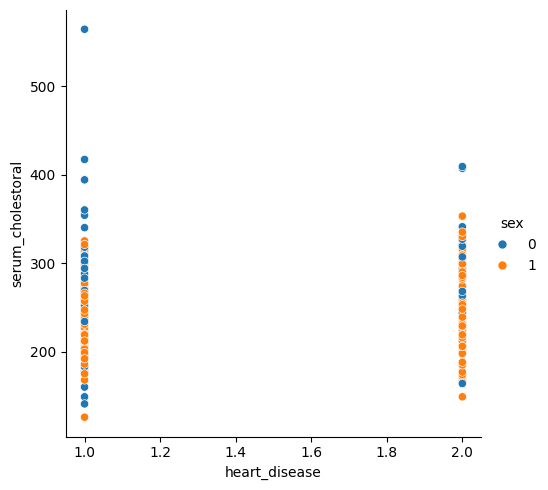

In [ ]:
sns.relplot(x='heart_disease', y='serum_cholestoral', hue='sex', data=data)

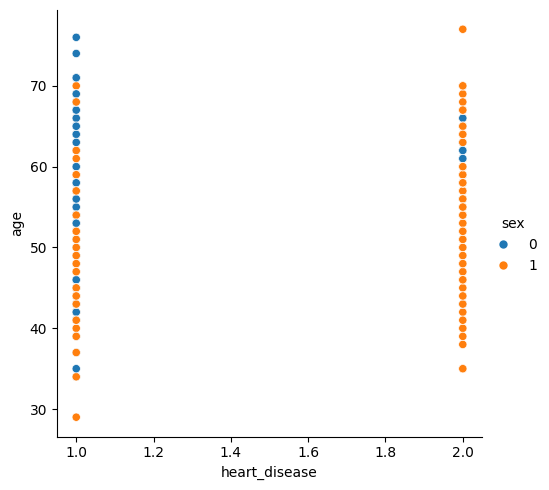

In [ ]:
sns.relplot(x='heart_disease', y='age', hue='sex', data=data)

In [10]:
data_new = data

In [11]:
#New Features - Feature Engineering Techniques
def age_group(age):
    if age < 35:
        return 'young'
    elif age < 55:
        return 'middle_aged'
    else:
        return 'senior'

data_new['age_group'] = data_new['age'].apply(age_group)


In [12]:
def cholesterol_level(chol):
    if chol < 200:
        return 'normal'
    elif chol < 240:
        return 'borderline_high'
    else:
        return 'high'

data_new['cholesterol_level'] = data_new['serum_cholestoral'].apply(cholesterol_level)

In [8]:
risk_factors = ['high blood pressure', 'high cholesterol', 'diabetes', 'smoker']

In [13]:
print(data_new.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'st_segment', 'major_vessels',
       'thal', 'heart_disease', 'age_group', 'cholesterol_level'],
      dtype='object')


In [15]:
risk_factors = [col for col in risk_factors if col in data_new.columns]

In [16]:
data_new['risk_factor_score'] = data_new[risk_factors].sum(axis=1)

In [17]:
print(data[['age', 'age_group', 'serum_cholestoral', 'cholesterol_level', 'risk_factor_score']].head())

   age age_group  serum_cholestoral cholesterol_level  risk_factor_score
0   70    senior                322              high                0.0
1   67    senior                564              high                0.0
2   57    senior                261              high                0.0
3   64    senior                263              high                0.0
4   74    senior                269              high                0.0
